# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Joaquín Herrera Suárez
- Nombre de alumno 2: Hecmar Taucare Reyes

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Joaquin-HS/MDS7202)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1.	El conjunto de entrenamiento es en aquel que realmente se entrenan los modelos, es decir se ajustan los parámetros de estos a las características de los datos con tal de realizar la mejor predicción posible dentro de estos en modelos supervisados y en no supervisados la mejor “separación”
Mientras que el conjunto de validación permite evaluar el rendimiento del modelo en cuanto a como generaliza.
Incluso con técnicas como  validación cruzada con k fold  se utiliza el conjunto de validación para hacer los entrenamientos usando distintas particiones del conjunto de datos, para que el modelo aprenda mejor.
Finalmente el conjunto de testeo sirve para ver el rendimiento final del modelo

2. Que nunca se conoce la etiqueta, por lo cual, no es tan fácil evaluar el rendimiento de los modelos y además se requiere expertiz para poder por ejemplo interpretar los clusters, por ejemplo si son clusters de clientes en el departamento de marketing, si es que los clientes comparten ciertas características en promedio con cierta dispersión podríamos encontrar distintos tipo de clientes, impulsivos, conservadores, entre otros

3.  La matriz de confusión es una representación visual para ver que numero de cada clase predice el modelo y contrastarla con el numero de las clases que efectivamente son, por lo cual, es una métrica que permite evaluar rendimiento tanto en clasificación binaria como multiclase

4.  

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

El Accuracy lo interpretaría como cuantas veces estoy prediciendo tanto la clase positiva como negativa de forma correcta con respecto al total de observaciones, siendo un porcentaje

$
\text{Precision} = \frac{TP}{TP + FP}
$

La precisión es una métrica porcentual  que mide cuantas veces estoy clasificando de forma correcta la clase positiva con respecto al total de veces en el que la clasifique bien, es decir como clase positiva más la cantidad de veces que me equivoque en clasificarla, por lo que es la precisión al momento de predecir la clase positiva

$
\text{Recall} = \frac{TP}{TP + FN}
$

El recall mide cuantas veces clasifico la clase positiva de forma correcta con respecto a las veces que la interpreto de forma correcta y las veces que me equivoco en la clase negativa, por lo que intenta capturar el rendimiento de las clases positivas clasificadas correctamente de todas las clases positivas en total

$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$

Mide el de forma equilibrada tanto el recall como la precisión, por lo que es una métrica equilibrada para ver como rinde mi modelo tanto al no equivocarme en clasificar la clase positiva como positiva y clasificar las clases positivas de forma correcta con respecto al total de clases positivas

5.  

Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.
Recall  ya que no quiero que se me vaya ninguna falla, a pesar de que me equivoque en clasificar como falla, porque, o sino puede parar o enlentecerse la producción, lo cual genera gastos considerables.

Detección de enfermedades altamente contagiosas.
Recall, ya que, no quiero que se me escape ninguna enfermedad altamente contagiosa, recordar que la métrica ve como clasifico el caso con enfermedad altamente contagiosa con respecto al total de casos verdaderos de enfermedad a pesar de que sobrediagnostique

Aprobación de créditos de alto riesgo.
Precisión, ya que, no me quiero equivocar en la cantidad de veces que entrego un crédito con respecto a la cantidad de veces en las que lo clasifico como  aprobación de créditos, osea no quiero entregarle un crédito a alguien que no lo merece en base a sus caracteristicas

Detección de crímenes.
F1 score ya que, quiero tener un equilibrio, tanto en la cantidad de veces que clasifico un crimen como crimen y la cantidad de veces que detecto el crimen de forma correcta con respecto a todos los crímenes reales

6. La calibración del modelo es el proceso por el cual se optimizan hiperparametros de forma manual o asistida por librerías de Python con el fin de mejorar al máximo el rendimiento del modelo, o enfocarlo en mejorar cierta métrica como precisión, recall, o que converga más rapido, como en el caso de las ANN

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.

**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [ ]:
import pandas as pd
df = pd.read_csv('stats_players.csv')
display(df)

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [ ]:
# 1. 0 no seleccionado, 1 seleccionado
df['label'] = df['National_Position'].apply(lambda x: 1 if pd.notnull(x) else 0)

# 2
df['label'].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

Se puede ver que la mayoría de jugadores no son seleccionados nacionales, lo que tiene sentido dentro del contexto ya que se seleccionan solamente los mejores jugadores, y estos suelen mantenerse en el tiempo.

In [ ]:
# 3

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, FunctionTransformer

# Listas de columnas categóricas, ordinales y continuas

# No se agrega 'National_Position' porque permite definir el label directamente
categorical_cols = ['Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate']

ordinal_cols = ['Weak_foot', 'Skill_Moves']

continuous_cols = ['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling',
                   'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
                   'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
                   'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                   'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
                   'Penalties', 'Volleys']

# Se crea el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('ord', MinMaxScaler(), ordinal_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

Se aplicaron transformaciones del tipo OneHotEncoder para las variables categóricas, de tal manera de que puedan interferir en los modelos de clasificación que se verán a continuación. Por su parte, se estandarizaron las variables numéricas continuas (standard scaler) como práctica común en general, aunque eventuales algoritmos de clasificación como árboles no lo necesiten. Por último, se utilizó un escalamiento min max para las variables numéricas ordinales, de tal forma que no pierdan el factor orden y distancia entre categorías, como podría ocurrir si se les efectua un standard scaler.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]

**Respuesta:**

In [ ]:
# 1.
from sklearn.model_selection import train_test_split

# Se separan las features y labels
X = df.drop(columns=['label'])
y = df['label']

# Se separan los datos en entrenamiento y prueba.
# Se considera un 60% de los datos para entrenamiento y un 40% para prueba.
# Stratify para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

In [ ]:
# 2

from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb

# Se define un pipeline con XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', xgb.XGBClassifier(random_state=42))
])

# Se define un pipeline con LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

In [ ]:
# 3

# Se entrena la pipeline con XGBoost
pipeline_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Ju...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Se entrena la pipeline con LightGBM
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 645, number of negative: 9907
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2624
[LightGBM] [Info] Number of data points in the train set: 10552, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,061126 -> initscore=-2,731747
[LightGBM] [Info] Start training from score -2,731747


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', ...]),
                                                 ('ord', MinMaxScaler(),
                                                  ['Weak_foot', 'Skill_Moves']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('classifier', LGBMClassifier(random_state=42))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [ ]:
# 1

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predicciones con XGBoost
y_pred_xgboost = pipeline_xgboost.predict(X_test)

# Predicciones con LightGBM
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Se calculan las métricas para XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, pos_label=1)
recall_xgboost = recall_score(y_test, y_pred_xgboost, pos_label=1)

# Se calculan las métricas para LightGBM
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm, pos_label=1)
recall_lightgbm = recall_score(y_test, y_pred_lightgbm, pos_label=1)

# Reporte de clasificación
print(f"XGBoost Accuracy: {accuracy_xgboost}")
print(f"XGBoost Precision: {precision_xgboost}")
print(f"XGBoost Recall: {recall_xgboost}")
print()
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgboost))

print("--------------------------------------------------------------")
print("--------------------------------------------------------------\n")

print(f"LightGBM Accuracy: {accuracy_lightgbm}")
print(f"LightGBM Precision: {precision_lightgbm}")
print(f"LightGBM Recall: {recall_lightgbm}")
print()
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lightgbm))

XGBoost Accuracy: 0.9488345650938033
XGBoost Precision: 0.6495726495726496
XGBoost Recall: 0.35348837209302325

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6606
           1       0.65      0.35      0.46       430

    accuracy                           0.95      7036
   macro avg       0.80      0.67      0.72      7036
weighted avg       0.94      0.95      0.94      7036

--------------------------------------------------------------
--------------------------------------------------------------

LightGBM Accuracy: 0.946560545764639
LightGBM Precision: 0.6551724137931034
LightGBM Recall: 0.2651162790697674

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6606
           1       0.66      0.27      0.38       430

    accuracy                           0.95      7036
   macro avg       0.80      0.63      0

*Accuracy* representa la proporción de predicciones correctas sobre el total de predicciones realizadas. *Precision*, por su parte, refiere a cuántos de los jugadores que cada modelo predijo como seleccionados (métrica de la clase positiva) realmente lo son, mientras que *recall* indica cuántos jugadores seleccionados (métrica de la clase positiva) fueron correctamente identificados por cada modelo.

Para estas métricas es de gran relevancia considerar si las clases están desbalanceadas o no. En este caso, existen muy pocos jugadores no seleccionados con respecto a los que sí, por lo que si se da el fenómeno mencionado. Considerando esta situación, los modelos, como se puede ver, tienden a clasificar la mayoría de los casos como la clase mayoritaria (clase 0), maximizando así tanto el `accuracy` como el `precision` (existirán pocas predicciones equivocadas, porque hay pocos seleccionados). Por su parte, el `recall` es bajo ya que la mayoría de los seleccionados están siendo clasificados como no seleccionados.

En este problema, el `recall` sería la métrica más importante, dado que permite evaluar cómo se está desempeñando el modelo para los jugadores que son seleccionados y el modelo está diciendo que no lo son (que es la mayoría de casos). En este sentido, XGBoost es el que tiene un mejor `recall` para la clase positiva, con un 0.35 sobre el 0.27 que tiene LightGBM.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [ ]:
# 1.

import pandas as pd

# Se definen las etiquetas
def label_position(position):
    if position in ['ST', 'CF']:
        return 'ataque'
    elif position in ['RW', 'CAM', 'LW']:
        return 'central_ataque'
    elif position in ['RM', 'CM', 'LM']:
        return 'central'
    elif position in ['RWB', 'CDM', 'LWB']:
        return 'central_defensa'
    elif position in ['RB', 'CB', 'LB']:
        return 'defensa'
    elif position == 'GK':
        return 'arquero'
    else:
        return None  # Para Sub y Res, que no se deben incluir

df['label'] = df['Club_Position'].apply(label_position)

# No se incluyen "Sub" y "Res"
df = df[df['label'].notnull()]

In [ ]:
# 2

df['label'].value_counts()

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

In [ ]:
# 3

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Listas de columnas categóricas, ordinales y continuas

# No se agrega 'National_Position' y 'Club_Position' porque permiten definir el label directamente (o casi directamente)
categorical_cols = ['Nationality', 'Preffered_Foot', 'Work_Rate']

ordinal_cols = ['Weak_foot', 'Skill_Moves']

continuous_cols = ['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling',
                   'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
                   'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
                   'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                   'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
                   'Penalties', 'Volleys']

# Se crea el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('ord', MinMaxScaler(), ordinal_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Se separan las features y labels
X = df.drop(columns=['label'])
y = df['label']

# Se separan los datos en entrenamiento y prueba.
# Se considera un 60% de los datos para entrenamiento y un 40% para prueba.
# Stratify para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Se actualiza el pipeline con un clasificador LinearSVC (justificado en base a la guía mencionada)
pipeline_svc = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', LinearSVC(random_state=42, class_weight='balanced'))
])

# Se entrena la pipeline
pipeline_svc.fit(X_train, y_train)

# Predicciones
y_pred_svc = pipeline_svc.predict(X_test)

# Reporte de clasificación
print("LinearSVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

LinearSVC Classification Report:
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       253
         ataque       0.70      0.81      0.75       172
        central       0.60      0.45      0.51       363
 central_ataque       0.44      0.44      0.44       232
central_defensa       0.30      0.40      0.35        84
        defensa       0.84      0.91      0.87       472

       accuracy                           0.71      1576
      macro avg       0.65      0.67      0.65      1576
   weighted avg       0.71      0.71      0.70      1576



Separando el análisis por clase, se tiene:

- Arquero: el modelo tiene un rendimiento perfecto para esta clase, lo que es entendible dado que la mayoría de las estadísticas numéricas son bajas para este tipo de jugadores. Se destaca la importancia de estandarizar las variables en este clasificador en específico, con respecto al caso anterior que no era necesario.

- Ataque: en esta clase los valores de precision y recall son relativamente altos, pero con espacio a mejorar.

- Central, central ataque, central defensa: estas clases cuentan con rendimientos bajos para precision y recall, lo que significa que el modelo no está logrando identificar a los jugadores que realmente deberían clasificarse como la clase respectiva.

- Defensa: en esta clase los valores de precision y recall son incluso mejores que ataque, por lo que el modelo identifica de buena forma a este tipo de jugadores.

En general, se destaca que el modelo identifica de buena forma a los jugadores que cuentan con características diferenciadoras entre sí, como suelen ser los porteros, ataques y defensas. Por otro lado, los mediocampistas pueden tener perfiles muy distintos entre sí, por lo que los modelos de clasificación pueden tener más problemas a la hora de identificarlos claramente.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [1]:
# Label de la sección 1.1

import pandas as pd
df = pd.read_csv('stats_players.csv')

# 0 no seleccionado, 1 seleccionado
df['label'] = df['National_Position'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [5]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# Entorno de PyCaret
exp = setup(data=df, target='label', session_id=123)

# Se comparan los modelos
modelos_a_comparar = ['et', 'rf', 'dt', 'xgboost', 'lightgbm']  # 'catboost' no está permitido por la librería
comparacion_modelos = compare_models(include=modelos_a_comparar)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 40)"
4,Transformed data shape,"(17588, 48)"
5,Transformed train set shape,"(12311, 48)"
6,Transformed test set shape,"(5277, 48)"
7,Numeric features,33
8,Categorical features,6
9,Rows with missing values,93.9%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9601,0.9402,0.3588,0.9666,0.5199,0.5039,0.5736,1.5640
et,Extra Trees Classifier,0.9523,0.8868,0.2313,0.9477,0.3670,0.3522,0.4510,1.7000
dt,Decision Tree Classifier,0.9383,0.5009,0.0027,0.1333,0.0052,0.0035,0.0126,0.2450
xgboost,Extreme Gradient Boosting,0.9383,0.8608,0.0027,0.1333,0.0052,0.0035,0.0126,0.4220
lightgbm,Light Gradient Boosting Machine,0.9383,0.6254,0.0027,0.1333,0.0052,0.0035,0.0126,2.4650


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

- Extra Trees (et): modelo que utiliza una serie de árboles de decisión para mejorar la precisión a través de un muestreo aleatorio de características para la creación de ellos, los cuales además se construyen a partir de un subconjunto de los datos. Se basa en que agregar múltiples modelos puede llevar a mejores predicciones.

- Random Forest (rf): modelo que utiliza múltiples árboles de decisión para hacer predicciones a partir de una votación final que se realiza a partir del resultado que entrega cada árbol de manera independiente. Estos árboles se entrenan sobre diferentes subconjuntos de datos.

- Decision Tree (dt): es la base del resto de modelos. Divide el espacio de características según determinado criterio (entropía o gini, por ejemplo) en regiones homogéneas tomando decisiones binarias según los atributos que permiten separar mejor los datos.

Se selecciona "Random Forest" en función de que es el modelo con mejores desempeños tanto en velocidad como en precisión.

In [6]:
# Se evalúa el modelo
evaluate_model(create_model('rf'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9659,0.9568,0.4605,0.9722,0.6250,0.6095,0.6566
1,0.9618,0.9557,0.4000,0.9375,0.5607,0.5441,0.5987
2,0.9659,0.9542,0.4400,1.0000,0.6111,0.5961,0.6516
3,0.9578,0.9467,0.3200,0.9600,0.4800,0.4637,0.5412
4,0.9626,0.9039,0.3867,1.0000,0.5577,0.5421,0.6098
5,0.9537,0.9099,0.2667,0.9091,0.4124,0.3957,0.4783
6,0.9594,0.9575,0.3600,0.9310,0.5192,0.5023,0.5650
7,0.9545,0.9052,0.2533,1.0000,0.4043,0.3892,0.4916
8,0.9561,0.9504,0.2933,0.9565,0.4490,0.4328,0.5166


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- Confusion matrix: para la clase mayoritaria se obtienen buenos resultados (verdaderos negativos), lo que tiene sentido según lo visto con respecto al desbalanceo de clases. Por otro lado, se aprecia que para la clase minoritaria se tiene un mal desempeño, lo que nuevamente coincide con los visto anteriormente (la mayoría de las clasificaciones dirán que el jugador no fue seleccionado, si no existe un proceso que aborde el desbalanceo).

- Threshold: con un umbral menor se podrían obtener valores similares en cuanto a las métricas que se están analizando.

- Feature importance: variables como el nombre y la nacionalidad son las más importantes, ya que permiten una buena representación de los jugadores (funcionan como llave, por lo que si se tiene esa información se puede saber prácticamente de manera directa si fue seleccionado o no).

- Learning curve: se aprecia que el modelo se sobreajustó en el entrenamiento, aun que no en gran medida dada la baja diferencia entre curvas de entrenamiento y validación. El problema del modelo está basado más en el desbalanceo de clases existente.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [15]:
# 1

import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Listas de columnas categóricas, ordinales y continuas

# Se agregan todas las características (excepto 'National_Position' porque permite definir el label directamente)
categorical_cols = ['Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate']

ordinal_cols = ['Weak_foot', 'Skill_Moves']

continuous_cols = ['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling',
                   'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
                   'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
                   'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                   'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
                   'Penalties', 'Volleys']

# Se crea el ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('ord', MinMaxScaler(), ordinal_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Se separan las features y labels
X = df.drop(columns=['label'])
y = df['label']

# Se separan los datos en entrenamiento y prueba.
# Se considera un 60% de los datos para entrenamiento y un 40% para prueba.
# Stratify para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Se define un pipeline con XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', xgb.XGBClassifier(random_state=42))
])

# Se entrena la pipeline
pipeline_xgboost.fit(X_train, y_train)

# Predicciones
y_pred_xgboost = pipeline_xgboost.predict(X_test)

# Reporte de clasificación
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgboost))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6606
           1       0.65      0.35      0.46       430

    accuracy                           0.95      7036
   macro avg       0.80      0.67      0.72      7036
weighted avg       0.94      0.95      0.94      7036



In [16]:
# 2

# Se extrae el modelo XGBoost del pipeline
xgboost_model = pipeline_xgboost.named_steps['classifier']

# Importancia de las características
importancia_features = xgboost_model.feature_importances_

# Se extraen los nombres de las características procesadas (después del one-hot encoding y escalado)
from sklearn.compose import ColumnTransformer

# Nombres de las columnas procesadas
onehot_features = pipeline_xgboost.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = continuous_cols + ordinal_cols + list(onehot_features)

# DataFrame para clasificar las características por importancia
import pandas as pd
feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importancia_features})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Características ordenadas por importancia de forma descendente
feature_importance_df

,feature,importance
9,Reactions,0.036192
141,Nationality_Peru,0.028797
99,Nationality_India,0.024644
69,Nationality_Czech Republic,0.023272
59,Nationality_China PR,0.023024
...,...,...
134,Nationality_Niger,0.000000
133,Nationality_New Zealand,0.000000
87,Nationality_Georgia,0.000000
131,Nationality_Namibia,0.000000


In [19]:
# 3 y 4

from sklearn.feature_selection import RFE

# Se define un pipeline con el modelo XGBoost dentro de un RFE
pipeline_rfe = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('rfe', RFE(estimator=xgboost_model, n_features_to_select=10, step=1))
])

# Se entrena la pipeline
pipeline_rfe.fit(X_train, y_train)

# Se seleccionan las características más importantes
X_train_rfe = pipeline_rfe.transform(X_train)
X_test_rfe = pipeline_rfe.transform(X_test)

# Se entrena un nuevo modelo XGBoost con las características seleccionadas
pipeline_xgboost_rfe = Pipeline(steps=[
    # ('preprocessor', col_transformer),
    ('classifier_rfe', xgb.XGBClassifier(random_state=42))
])

# Se entrena la pipeline
pipeline_xgboost_rfe.fit(X_train_rfe, y_train)

# Predicciones
y_pred_xgboost_rfe = pipeline_xgboost_rfe.predict(X_test_rfe)

# Reporte de clasificación
print("XGBoost RFE Classification Report:")
print(classification_report(y_test, y_pred_xgboost_rfe))

XGBoost RFE Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6606
           1       0.58      0.11      0.19       430

    accuracy                           0.94      7036
   macro avg       0.76      0.55      0.58      7036
weighted avg       0.92      0.94      0.92      7036



Se observa que tanto para precision como para recall el modelo con características seleccionadas tiene peor rendimiento, esencialmente para la clase positiva. Los problemas que se habían mencionado previamente se realzan al disminuir el número de características.

Eliminar variables de modelos permite no solo simplificarlos, lo que lo hace más fácil de interpretar (las variables seleccionadas suelen tener más peso en la decisión final (se elimina ruido), lo que permite hacer interpretaciones más claras sobre por qué un jugador fue clasificado de cierta manera), sino que también reduce tiempos de entrenamiento y además mejora su capacidad de generalización, ya que evita sobreajuste generado por características menos relevantes. Sin embargo, para este caso, eliminar variables empeoró el desempeño del modelo. Esto se debe principalmente al desequilibrio de clases existente, lo que implica que descartar variables generó una pérdida de información relevante (marcada además por la existencia de un gran número de variables dummie que vienen de los atributos categóricos originales) y amplificó el sesgo existente en los datos.

Con esto, se concluye que en esta eliminación particular de variables, el modelo se simplificó en exceso, eliminando información clave y debilitando la capacidad del modelo para reconocer adecuadamente los patrones que identifican la clase positiva.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

Brier Score del modelo no calibrado: 0.0381
Brier Score del modelo calibrado: 0.0495


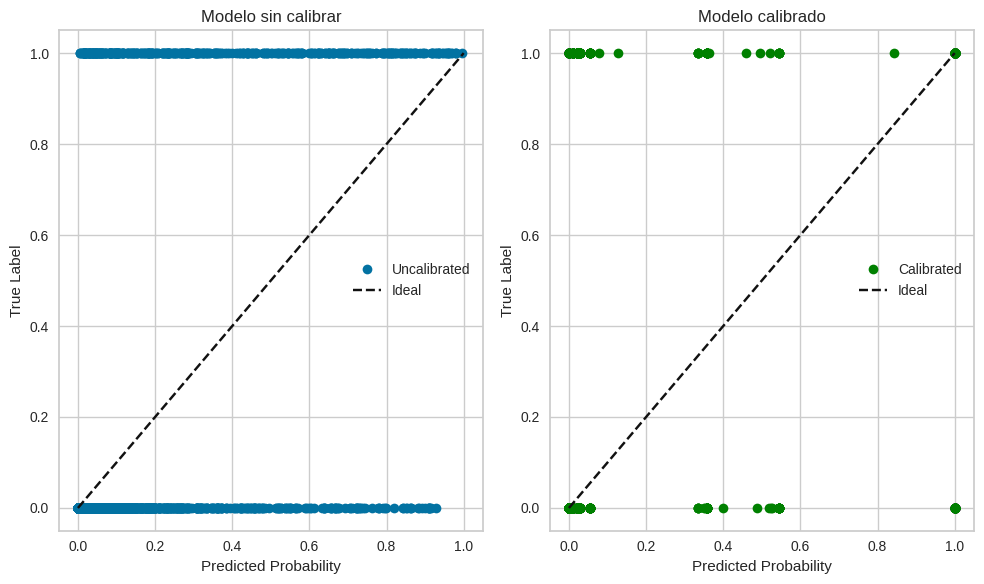

Brier Score antes de la calibración: 0.0381
Brier Score después de la calibración: 0.0495


In [21]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Probabilidades predichas (antes de la calibración)
y_prob_uncalibrated = pipeline_xgboost.predict_proba(X_test)[:, 1]  # Solo clase positiva

# Brier Score para el modelo no calibrado
brier_score_uncalibrated = brier_score_loss(y_test, y_prob_uncalibrated)
print(f"Brier Score del modelo no calibrado: {brier_score_uncalibrated:.4f}")

# Se calibra el modelo usando calibración isotónica (garantiza monotonía)
pipeline_calibrated_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', CalibratedClassifierCV(pipeline_xgboost.named_steps['classifier'], method='isotonic', cv='prefit'))
])

# Se ajusta el calibrador
pipeline_calibrated_xgboost.fit(X_train, y_train)

# Probabilidades predichas después de la calibración
y_prob_calibrated = pipeline_calibrated_xgboost.predict_proba(X_test)[:, 1]

# Brier Score para el modelo calibrado
brier_score_calibrated = brier_score_loss(y_test, y_prob_calibrated)
print(f"Brier Score del modelo calibrado: {brier_score_calibrated:.4f}")

# Comparación visual de las probabilidades predichas vs las ideales
plt.figure(figsize=(10, 6))

# Gráfico de las probabilidades predichas vs ideales (sin calibrar)
plt.subplot(1, 2, 1)
plt.plot(y_prob_uncalibrated, y_test, 'o', label='Uncalibrated')
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Modelo sin calibrar')
plt.legend()

# Gráfico de las probabilidades predichas vs ideales (calibrado)
plt.subplot(1, 2, 2)
plt.plot(y_prob_calibrated, y_test, 'o', label='Calibrated', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Modelo calibrado')
plt.legend()

plt.tight_layout()
plt.show()

# Resultados finales
print(f"Brier Score antes de la calibración: {brier_score_uncalibrated:.4f}")
print(f"Brier Score después de la calibración: {brier_score_calibrated:.4f}")

Un aumento en el Brier Score después de la calibración sugiere que las probabilidades predichas son menos precisas con respecto a las etiquetas verdaderas, a pesar de haber realizado una calibración isotónica que busca mejorar la correspondencia entre las probabilidades predichas y las frecuencias reales de las clases.